<a href="https://colab.research.google.com/github/kdy5213/AI-ExpertFW-Prj/blob/main/renttherunway_EDA_hsb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [1]:
from google.colab import drive
drive.mount('/content/drive')

#path_work = '/content/00_work1'
#os.symlink('/content/drive/MyDrive/00_work1', path_work)

Mounted at /content/drive


In [3]:

os.getcwd()
os.chdir("/content/drive/MyDrive/git_works")


In [4]:
pwd

'/content/drive/MyDrive/git_works'

In [5]:
mc_df = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/GitHub/AI-ExpertFW-Prj/dataset/renttherunway.xlsx')

mc_df.head()

,fit,user_id,bust size,item_id,weight,rating,rented for,review_text,body type,review_summary,category,height,size,age,review_date
0,fit,420272,34d,2260466,137lbs,10.0,vacation,An adorable romper! Belt and zipper were a lit...,hourglass,So many compliments!,romper,"5' 8""",14,28.0,"April 20, 2016"
1,fit,273551,34b,153475,132lbs,10.0,other,I rented this dress for a photo shoot. The the...,straight & narrow,I felt so glamourous!!!,gown,"5' 6""",12,36.0,"June 18, 2013"
2,fit,360448,NaN,1063761,NaN,10.0,party,This hugged in all the right places! It was a ...,NaN,It was a great time to celebrate the (almost) ...,sheath,"5' 4""",4,116.0,"December 14, 2015"
3,fit,909926,34c,126335,135lbs,8.0,formal affair,I rented this for my company's black tie award...,pear,Dress arrived on time and in perfect condition.,dress,"5' 5""",8,34.0,"February 12, 2014"
4,fit,151944,34b,616682,145lbs,10.0,wedding,I have always been petite in my upper body and...,athletic,Was in love with this dress !!!,gown,"5' 9""",12,27.0,"September 26, 2016"


In [6]:
mc_df.shape

(192544, 15)

In [7]:
mc_df.columns

Index(['fit', 'user_id', 'bust size', 'item_id', 'weight', 'rating',
       'rented for', 'review_text', 'body type', 'review_summary', 'category',
       'height', 'size', 'age', 'review_date'],
      dtype='object')

In [8]:
mc_df.columns = ['fit', 'user_id', 'bust_size', 'item_id', 'weight_lbs', 'rating',
       'rented_for', 'review_text', 'body_type', 'review_summary', 'category',
       'height', 'size', 'age', 'review_date']

In [9]:
mc_df['user_id']

0         420272
1         273551
2         360448
3         909926
4         151944
           ...  
192539     66386
192540    118398
192541     47002
192542    961120
192543    123612
Name: user_id, Length: 192544, dtype: int64

In [10]:
mc_df[mc_df['user_id'] == 727820]#.head()

,fit,user_id,bust_size,item_id,weight_lbs,rating,rented_for,review_text,body_type,review_summary,category,height,size,age,review_date
16571,large,727820,34b,1429022,130lbs,10.0,wedding,I wore this dress to my cousin's barn wedding....,pear,Great dress for a day wedding!,dress,"5' 5""",4,29.0,"August 9, 2016"


In [11]:
mc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192544 entries, 0 to 192543
Data columns (total 15 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   fit             192544 non-null  object 
 1   user_id         192544 non-null  int64  
 2   bust_size       174133 non-null  object 
 3   item_id         192544 non-null  int64  
 4   weight_lbs      162562 non-null  object 
 5   rating          192462 non-null  float64
 6   rented_for      192534 non-null  object 
 7   review_text     192481 non-null  object 
 8   body_type       177907 non-null  object 
 9   review_summary  192194 non-null  object 
 10  category        192544 non-null  object 
 11  height          191867 non-null  object 
 12  size            192544 non-null  int64  
 13  age             191584 non-null  float64
 14  review_date     192544 non-null  object 
dtypes: float64(2), int64(3), object(10)
memory usage: 22.0+ MB


# missing value 비율

In [12]:
df = mc_df.copy()

In [13]:
missing_data = pd.DataFrame({'total_missing': df.isnull().sum(), 'perc_missing': (df.isnull().sum()/df.shape[0])*100})
missing_data

,total_missing,perc_missing
fit,0,0.000000
user_id,0,0.000000
bust_size,18411,9.561970
item_id,0,0.000000
weight_lbs,29982,15.571506
rating,82,0.042588
rented_for,10,0.005194
review_text,63,0.032720
body_type,14637,7.601899
review_summary,350,0.181777


In [14]:
df['bust_size'].unique()

array(['34d', '34b', nan, '34c', '32b', '34d+', '36d', '36a', '32d+',
       '36c', '32c', '32dd', '30dd', '32d', '36b', '34a', '34dd',
       '40ddd/e', '32a', '38d+', '38c', '34ddd/e', '38a', '38b', '38d',
       '36ddd/e', '38dd', '38f', '42dd', '36dd', '40g', '40dd', '28f',
       '30ddd/e', '32ddd/e', '28b', '36d+', '40d', '28dd', '34f', '42c',
       '30d', '30b', '42d', '34aa', '32aa', '36f', '28c', '40b', '36aa',
       '34g', '32f', '42ddd/e', '40c', '28g', '28aa', '36g', '30a',
       '44ddd/e', '30c', '30aa', '44dd', '32i', '32g', '30g', '38h',
       '30h', '34j', '38ddd/e', '32h', '28a', '44d', '40h', '38g', '34h',
       '36j', '40f', '36h', '28ddd/e', '44f', '34i', '30f', '36i', '30i',
       '28h', '42b', '42j', '32j', '46c', '48d', '38aa', '38i', '48dd',
       '28d', '28i', '46ddd/e', '42g', '44c', '42f', '40j', '38j', '46f',
       '44b', '44g', '42h', '40i', '44h'], dtype=object)

In [15]:
df['weight_lbs'] = df['weight_lbs'].str.replace('lbs', '') #lbs 단위 제거

In [16]:
df['weight_lbs'] = df['weight_lbs'].astype(float) #결측치 0으로 채우기 
df['weight_lbs'].fillna(0)

0         137.0
1         132.0
2           0.0
3         135.0
4         145.0
          ...  
192539    140.0
192540    100.0
192541    135.0
192542    165.0
192543    155.0
Name: weight_lbs, Length: 192544, dtype: float64

In [17]:
df['weight_kg'] = df['weight_lbs'] * 0.453592 #lbs > kg로 변환하여 새로운 컬럼으로 저장 

In [18]:
df.drop(columns='weight_lbs',inplace= True)

In [19]:
df['rented_for'].unique()

array(['vacation', 'other', 'party', 'formal affair', 'wedding', 'date',
       'everyday', 'work', nan, 'party: cocktail'], dtype=object)

In [20]:
df[df['rented_for'] == 'party']

,fit,user_id,bust_size,item_id,rating,rented_for,review_text,body_type,review_summary,category,height,size,age,review_date,weight_kg
2,fit,360448,NaN,1063761,10.0,party,This hugged in all the right places! It was a ...,NaN,It was a great time to celebrate the (almost) ...,sheath,"5' 4""",4,116.0,"December 14, 2015",NaN
10,small,185966,34b,1077123,8.0,party,The dress arrived with a small hole in the bea...,athletic,It was fun to wear a dress I wouldn't normally...,dress,"5' 3""",12,33.0,"January 2, 2018",61.234920
12,fit,87660,36a,1295171,10.0,party,The S was snug but in a good way. I wore a pus...,straight & narrow,This dress made me feel so confident & sexy!,sheath,"5' 6""",8,26.0,"July 28, 2016",54.431040
13,large,391778,36d,143094,8.0,party,I ordered this dress as a replacement because ...,apple,Ordered this as a replacement dress,dress,"5' 2""",20,29.0,"October 4, 2014",64.410064
15,fit,829124,34c,2595752,10.0,party,Medium would have been a better fit but large ...,hourglass,These leggings are awesome!,leggings,"5' 7""",20,30.0,"May 16, 2016",63.502880
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192517,fit,829883,36d,2842792,10.0,party,"I think it's got a great shape, the fabric dra...",full bust,"Love the top, lots of compliments",top,"5' 8""",20,55.0,"September 4, 2017",NaN
192521,small,691468,34c,1000739,10.0,party,"like most E&J dresses, this runs a bit small. ...",full bust,awesome staple in any wardrobe,dress,"5' 3""",12,31.0,"November 9, 2015",56.699000
192522,fit,217111,34a,200393,8.0,party,This was a really cute dress - I loved the pat...,athletic,I loved the pattern with a pop of yellow. Very...,shift,"5' 6""",20,35.0,"April 16, 2013",58.966960
192525,large,240016,36d,1568818,8.0,party,I wore this to my husband's holiday party that...,apple,"Fun, flirty dress - great for a holiday party!",dress,"5' 7""",24,38.0,"December 20, 2017",76.203456


In [21]:
df[df['rented_for'].isnull() == True]

,fit,user_id,bust_size,item_id,rating,rented_for,review_text,body_type,review_summary,category,height,size,age,review_date,weight_kg
7391,large,282102,NaN,1949394,8.0,NaN,this was a nice dress&easy to wear and *%$,pear,NaN,sheath,"5' 7""",16,26.0,"July 14, 2016",99.790240
17609,fit,491589,38dd,1895994,10.0,NaN,Stylist Review: \nMust rent this dress. It's p...,full bust,NaN,dress,"5' 9""",24,24.0,"August 10, 2016",95.254320
26600,fit,38132,32d,1750560,10.0,NaN,Loved the easy fit and fun pattern. I've rente...,athletic,NaN,dress,"5' 3""",8,35.0,"July 12, 2016",62.595696
55393,fit,102215,34b,2125959,10.0,NaN,This romper is amazing - I think I need to buy...,straight & narrow,NaN,romper,"5' 7""",4,25.0,"July 27, 2016",61.234920
65074,fit,371285,32b,1673742,10.0,NaN,The dress was so beautiful! It has a gorgeous ...,hourglass,NaN,dress,"5' 6""",4,28.0,"August 9, 2016",58.966960
71397,fit,102215,34b,2122305,10.0,NaN,This romper was comfortable and stretchy. I wo...,straight & narrow,NaN,romper,"5' 7""",4,25.0,"July 12, 2016",61.234920
76804,fit,282102,NaN,1168767,8.0,NaN,NaN,pear,NaN,dress,"5' 7""",1,26.0,"July 14, 2016",99.790240
86065,fit,603869,NaN,1825667,8.0,NaN,seg,athletic,NaN,dress,"5' 5""",3,28.0,"July 19, 2016",58.059776
148559,fit,710972,34b,1825667,2.0,NaN,NaN,petite,NaN,dress,"5' 5""",3,35.0,"July 12, 2016",49.895120
176050,fit,867592,34a,1260731,10.0,NaN,"The fit was perfect. I’m 5’5”, 115 lbs and I w...",petite,NaN,dress,"5' 5""",4,47.0,"November 4, 2017",52.163080


In [22]:
df.replace({'rented_for':'party: cocktail'},'party', inplace=True) #party:cocktail 인 데이터가 1건.  party로 수정


In [23]:
 print('Before : ' , df.shape)
df.dropna(subset=['rented_for'], inplace =True)
print('After : ' , df.shape) 


Before :  (192544, 15)
After :  (192534, 15)


# rented_for category
- 'vacation', 'other', 'party', 'formal affair', 'wedding', 'date', 'everyday', 'work'

In [24]:
df['rented_for'].unique()

array(['vacation', 'other', 'party', 'formal affair', 'wedding', 'date',
       'everyday', 'work'], dtype=object)

# body_type category
- 'apple', 'athletic', 'full bust', 'hourglass', 'pear', 'petite', 'straight & narrow'

In [25]:
 print('Before : ' , df.shape)
df.dropna(subset=['body_type'], inplace =True)
print('After : ' , df.shape) 

Before :  (192534, 15)
After :  (177897, 15)


In [26]:
df['body_type'].unique()

array(['hourglass', 'straight & narrow', 'pear', 'athletic', 'full bust',
       'petite', 'apple'], dtype=object)

In [27]:
df['category'].value_counts()

dress           85754
gown            40906
sheath          17865
shift            5012
jumpsuit         4723
                ...  
sweatershirt        4
overcoat            2
sweatpants          2
crewneck            1
buttondown          1
Name: category, Length: 68, dtype: int64

In [28]:
df['rented_for'] = df['rented_for'].astype('category') #category 변수 데이터 타입 변경 
df['body_type'] = df['body_type'].astype('category')

In [29]:
df['category'].value_counts().to_csv("/content/drive/MyDrive/git_works/category_data.csv") #category 종류 엄청 많음..

In [30]:
def get_cms(x):
    if type(x) == type(1.0):
        return
    #print(x)
    try: 
        return (int(x[0])*30.48) + (int(x[4:-2])*2.54)
    except:
        return (int(x[0])*30.48)
df.height = df.height.apply(get_cms)  

In [31]:
df.tail(30)

,fit,user_id,bust_size,item_id,rating,rented_for,review_text,body_type,review_summary,category,height,size,age,review_date,weight_kg
192513,small,389288,34b,765872,10.0,wedding,I ordered a 4L and it was perfect length but w...,athletic,Besides this dress just being stunning and sex...,gown,152.40,17,34.0,"June 30, 2015",65.770840
192514,small,449110,NaN,914136,8.0,wedding,This was a really fun dress for a fall wedding...,full bust,I felt trendy and cute!,dress,152.40,16,31.0,"November 10, 2016",NaN
192516,fit,763229,36b,1566348,8.0,date,I wore this to a very formal restaurant and pe...,hourglass,Color stands out and turns heads,dress,152.40,12,22.0,"May 9, 2016",62.595696
192517,fit,829883,36d,2842792,10.0,party,"I think it's got a great shape, the fabric dra...",full bust,"Love the top, lots of compliments",top,152.40,20,55.0,"September 4, 2017",NaN
192518,small,589122,34c,598696,6.0,wedding,Thought this dress would be perfect for a wint...,hourglass,Didn't fit!,dress,152.40,4,26.0,"December 20, 2016",60.781328
192519,fit,121299,34b,254960,10.0,wedding,I paired this sheath with nude heals and spark...,athletic,"I looked and felt gorgeous in this dress, whic...",sheath,152.40,16,40.0,"June 3, 2015",68.038800
192520,small,391237,NaN,1695279,8.0,wedding,PROS: \nBeautiful\nLace is gorgeous\nBack cut ...,straight & narrow,"The dress is gorgeous, there is no doubt about...",sheath,152.40,57,32.0,"May 22, 2014",111.130040
192521,small,691468,34c,1000739,10.0,party,"like most E&J dresses, this runs a bit small. ...",full bust,awesome staple in any wardrobe,dress,152.40,12,31.0,"November 9, 2015",56.699000
192522,fit,217111,34a,200393,8.0,party,This was a really cute dress - I loved the pat...,athletic,I loved the pattern with a pop of yellow. Very...,shift,152.40,20,35.0,"April 16, 2013",58.966960
192523,fit,105485,34d,2058499,10.0,date,"I could've worn either, but opted for the larg...",pear,Very comfortable,romper,152.40,20,40.0,"October 1, 2017",62.142104


# data types, describe

In [32]:
df.dtypes

fit                 object
user_id              int64
bust_size           object
item_id              int64
rating             float64
rented_for        category
review_text         object
body_type         category
review_summary      object
category            object
height             float64
size                 int64
age                float64
review_date         object
weight_kg          float64
dtype: object

In [33]:
df.describe()

,user_id,item_id,rating,height,size,age,weight_kg
count,177897.000000,1.778970e+05,177815.000000,177349.000000,177897.000000,177492.000000,153877.000000
mean,499348.310213,1.034885e+06,9.082203,152.494869,12.221533,33.959525,62.308673
std,288931.830746,8.088512e+05,1.437503,3.994725,8.481253,8.056608,9.935463
min,9.000000,1.233730e+05,2.000000,121.920000,0.000000,0.000000,22.679600
25%,250342.000000,1.851820e+05,8.000000,152.400000,8.000000,29.000000,55.791816
50%,499011.000000,9.323470e+05,10.000000,152.400000,12.000000,32.000000,61.234920
75%,750845.000000,1.675905e+06,10.000000,152.400000,16.000000,37.000000,67.585208
max,999997.000000,2.966087e+06,10.000000,182.880000,58.000000,117.000000,136.077600


/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


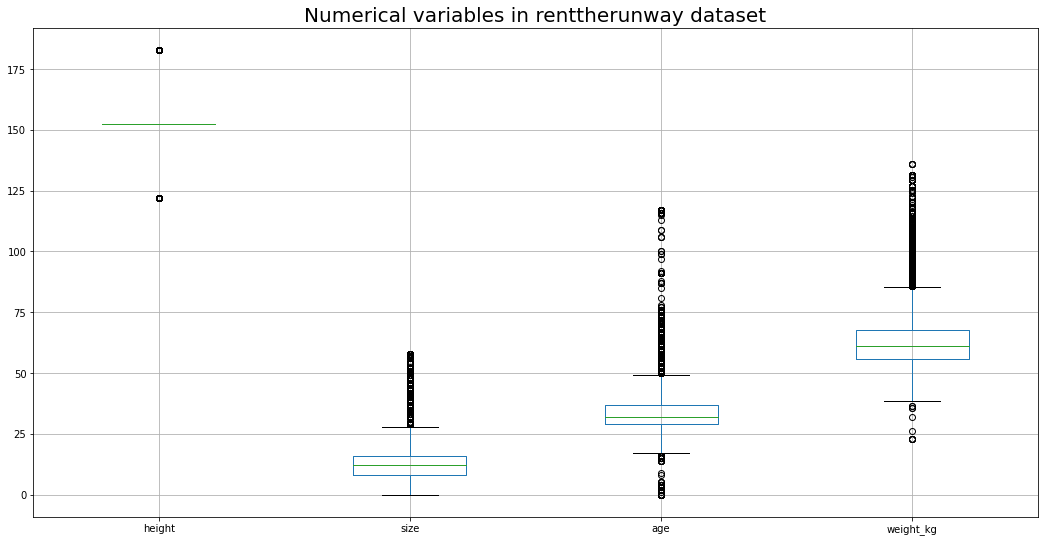

In [34]:
num_cols = ['height','size','age','weight_kg']
plt.figure(figsize=(18,9))
df[num_cols].boxplot()
plt.title("Numerical variables in renttherunway dataset", fontsize=20)
plt.show()

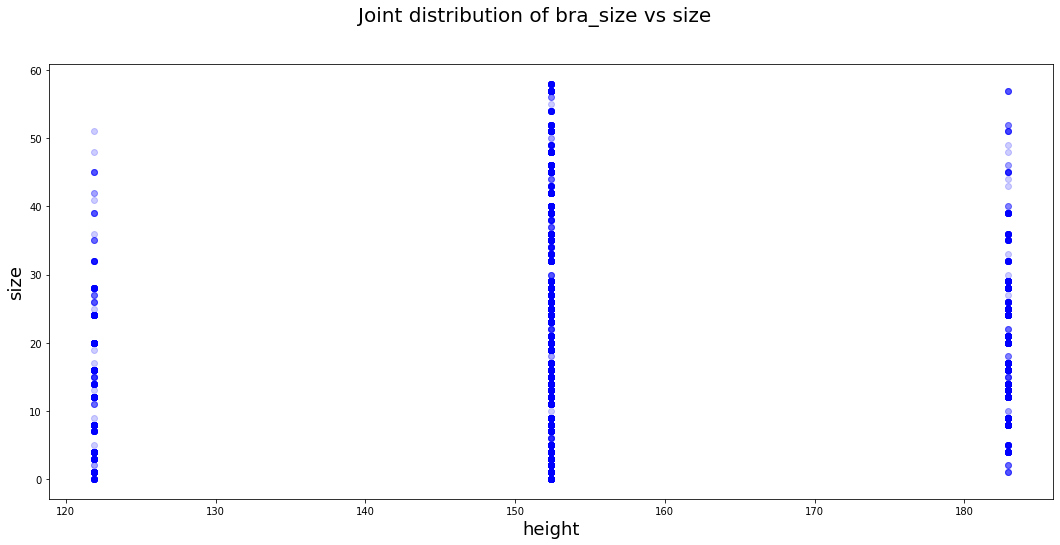

In [35]:
plt.figure(figsize=(18,8))
plt.xlabel("height", fontsize=18)
plt.ylabel("size", fontsize=18)
plt.suptitle("Joint distribution of bra_size vs size", fontsize= 20)
#plt.plot(mc_df['bra_size'], mc_df['size'], 'bo', alpha=0.2)
plt.plot(df.height, df['size'], 'bo', alpha=0.2)
plt.show()

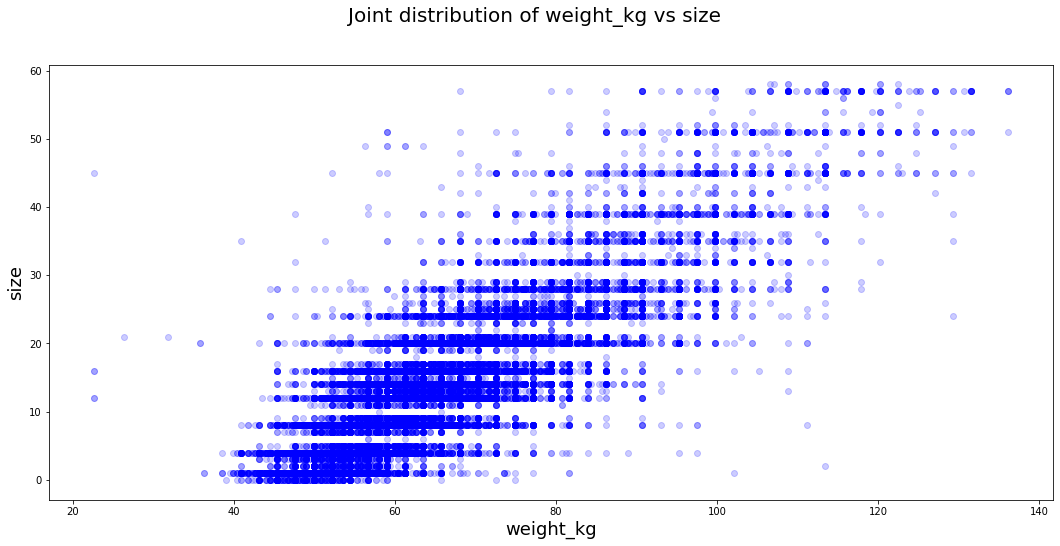

In [36]:
plt.figure(figsize=(18,8))
plt.xlabel("weight_kg", fontsize=18)
plt.ylabel("size", fontsize=18)
plt.suptitle("Joint distribution of weight_kg vs size", fontsize= 20)
#plt.plot(mc_df['bra_size'], mc_df['size'], 'bo', alpha=0.2)
plt.plot(df.weight_kg, df['size'], 'bo', alpha=0.2)
plt.show()

In [37]:
def plot_dist(col, ax):
    df[col][df[col].notnull()].value_counts().plot(kind='bar', facecolor='y', ax=ax)
    ax.set_xlabel('{}'.format(col), fontsize=20)
    ax.set_title("{} on Modcloth".format(col), fontsize= 18)
    return ax


KeyboardInterrupt: ignored

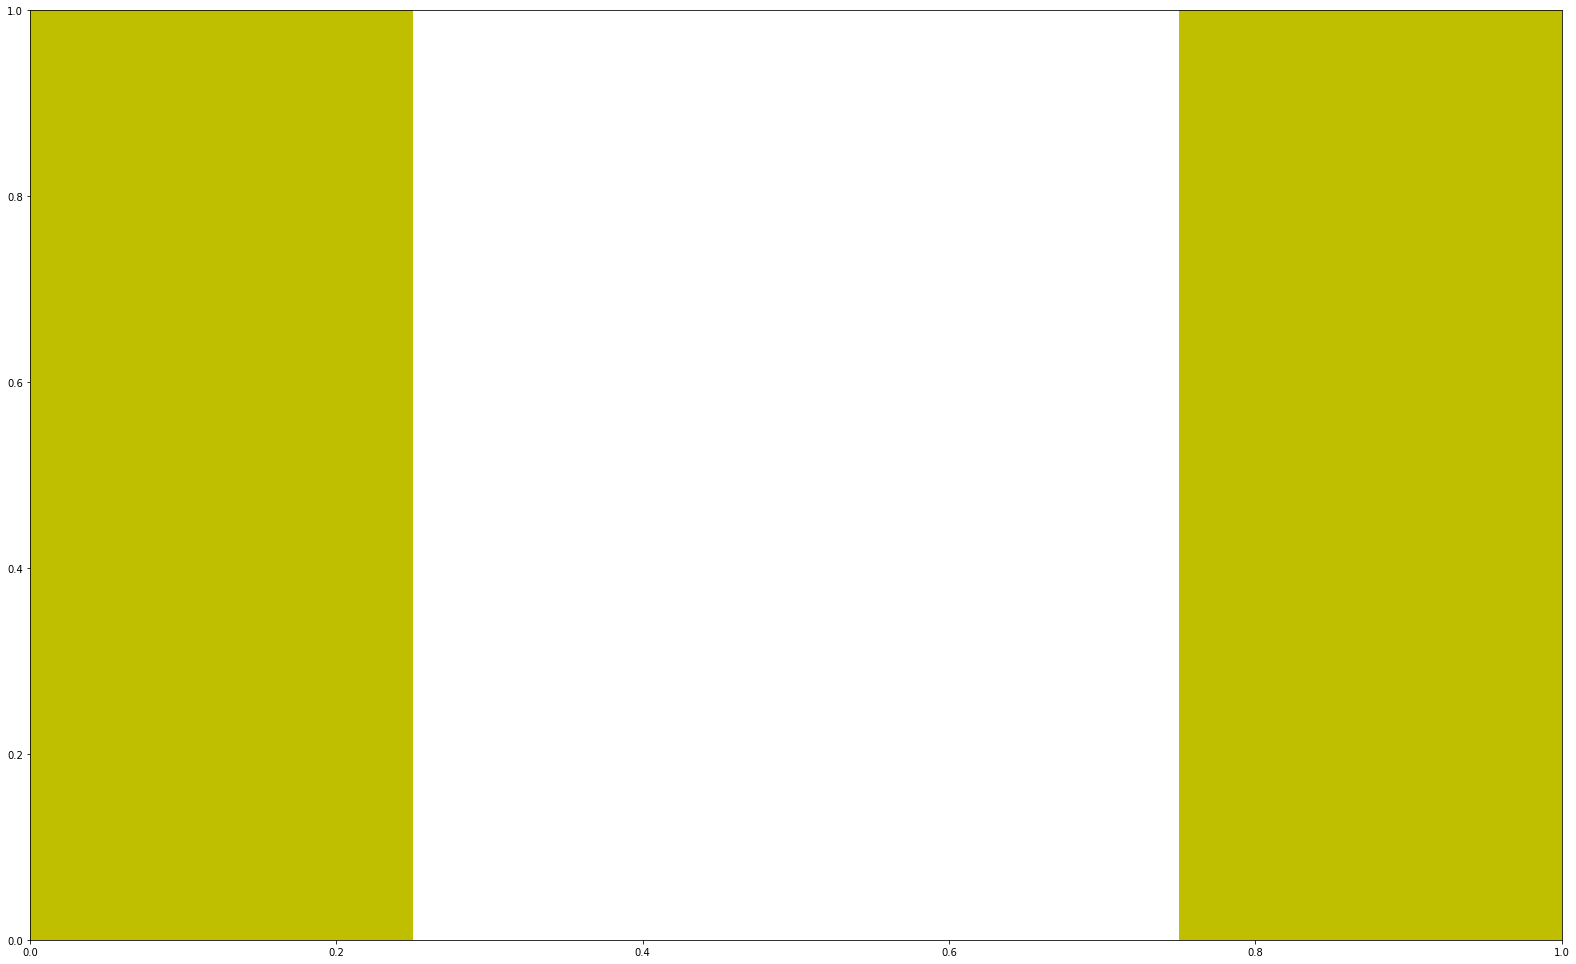

In [38]:
f, ax = plt.subplots(1, 1, figsize = (22,15))
f.tight_layout(h_pad=9, w_pad=2, rect=[0, 0.03, 1, 0.93])
plot_dist('user_id', ax)

In [40]:
def plot_barh(df,col, cmap = None, stacked=False, norm = None):
    df.plot(kind='barh', colormap=cmap, stacked=stacked)
    fig = plt.gcf()
    fig.set_size_inches(24,12)
    plt.title("Category vs {}-feedback -  Modcloth {}".format(col, '(Normalized)' if norm else ''), fontsize= 20)
    plt.ylabel('Category', fontsize = 18)
    plot = plt.xlabel('Frequency', fontsize=18)

In [41]:
def norm_counts(t):
    norms = np.linalg.norm(t.fillna(0), axis=1)
    #print(norms)
    t_norm = t[0:0]
    for row, euc in zip(t.iterrows(), norms):
        t_norm.loc[row[0]] = list(map(lambda x: x/euc, list(row[1])))
    return t_norm


In [42]:
df.category.value_counts()

dress           85754
gown            40906
sheath          17865
shift            5012
jumpsuit         4723
                ...  
sweatershirt        4
overcoat            2
sweatpants          2
crewneck            1
buttondown          1
Name: category, Length: 68, dtype: int64

In [43]:
df

,fit,user_id,bust_size,item_id,rating,rented_for,review_text,body_type,review_summary,category,height,size,age,review_date,weight_kg
0,fit,420272,34d,2260466,10.0,vacation,An adorable romper! Belt and zipper were a lit...,hourglass,So many compliments!,romper,152.4,14,28.0,"April 20, 2016",62.142104
1,fit,273551,34b,153475,10.0,other,I rented this dress for a photo shoot. The the...,straight & narrow,I felt so glamourous!!!,gown,152.4,12,36.0,"June 18, 2013",59.874144
3,fit,909926,34c,126335,8.0,formal affair,I rented this for my company's black tie award...,pear,Dress arrived on time and in perfect condition.,dress,152.4,8,34.0,"February 12, 2014",61.234920
4,fit,151944,34b,616682,10.0,wedding,I have always been petite in my upper body and...,athletic,Was in love with this dress !!!,gown,152.4,12,27.0,"September 26, 2016",65.770840
5,fit,734848,32b,364092,8.0,date,Didn't actually wear it. It fit perfectly. The...,athletic,Traditional with a touch a sass,dress,152.4,8,45.0,"April 30, 2016",62.595696
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192539,fit,66386,34dd,2252812,10.0,work,Fit like a glove!,hourglass,LOVE IT!!! First Item Im thinking of buying!,jumpsuit,152.4,8,42.0,"May 18, 2016",63.502880
192540,fit,118398,32c,682043,10.0,work,The pattern contrast on this dress is really s...,petite,LOVE it!,dress,152.4,4,29.0,"September 30, 2016",45.359200
192541,fit,47002,36a,683251,6.0,everyday,"Like the other DVF wraps, the fit on this is f...",straight & narrow,"Loud patterning, flattering fit",dress,152.4,8,31.0,"March 4, 2016",61.234920
192542,fit,961120,36c,126335,10.0,wedding,This dress was PERFECTION. it looked incredib...,pear,loved this dress it was comfortable and photog...,dress,152.4,16,31.0,"November 25, 2015",74.842680


In [44]:
g_by_userid = mc_df.groupby('user_id', axis = 0)
cat_size = g_by_userid.count()

df[df['user_id'] == 420272]

,fit,user_id,bust_size,item_id,rating,rented_for,review_text,body_type,review_summary,category,height,size,age,review_date,weight_kg
0,fit,420272,34d,2260466,10.0,vacation,An adorable romper! Belt and zipper were a lit...,hourglass,So many compliments!,romper,152.4,14,28.0,"April 20, 2016",62.142104
16494,fit,420272,34d,1083818,10.0,vacation,"Absolutely gorgeous dress. Great fit, no compl...",hourglass,Beautiful!,dress,152.4,14,28.0,"April 20, 2016",62.142104
42588,fit,420272,34d,2340996,2.0,everyday,I really was not into this jumpsuit. It has a ...,hourglass,Looks and feels like cheap PJs,jumpsuit,152.4,14,28.0,"April 20, 2016",62.142104
61172,fit,420272,34d,2363191,10.0,party,SO many compliments. Glad I got the 6-- fit my...,hourglass,LOVED this!,jumpsuit,152.4,12,28.0,"August 16, 2016",62.142104
70351,fit,420272,34d,348662,8.0,other,I could wear this literally forever. It is fai...,hourglass,"Gorgeous, low cut",dress,152.4,8,28.0,"June 15, 2016",62.142104
135118,small,420272,34d,2431951,6.0,vacation,I had to send this back in my unlimited shipme...,hourglass,Not long enough in the torso,jumpsuit,152.4,14,28.0,"April 20, 2016",62.142104


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:723: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


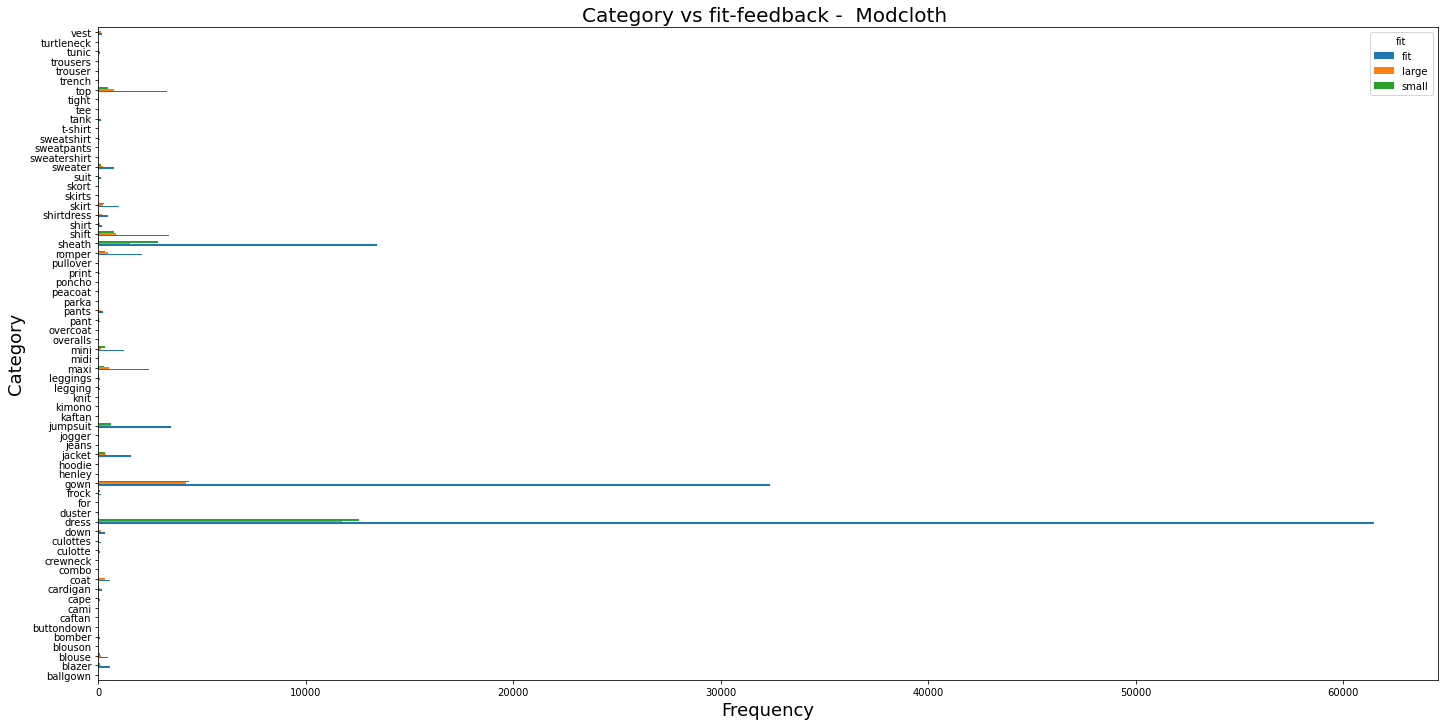

In [45]:
g_by_category = df.groupby('category')
cat_fit = g_by_category['fit'].value_counts()
cat_fit = cat_fit.unstack()
cat_fit_norm = norm_counts(cat_fit)
cat_fit_norm.drop(['fit'], axis=1, inplace=True)
plot_barh(cat_fit, 'fit')

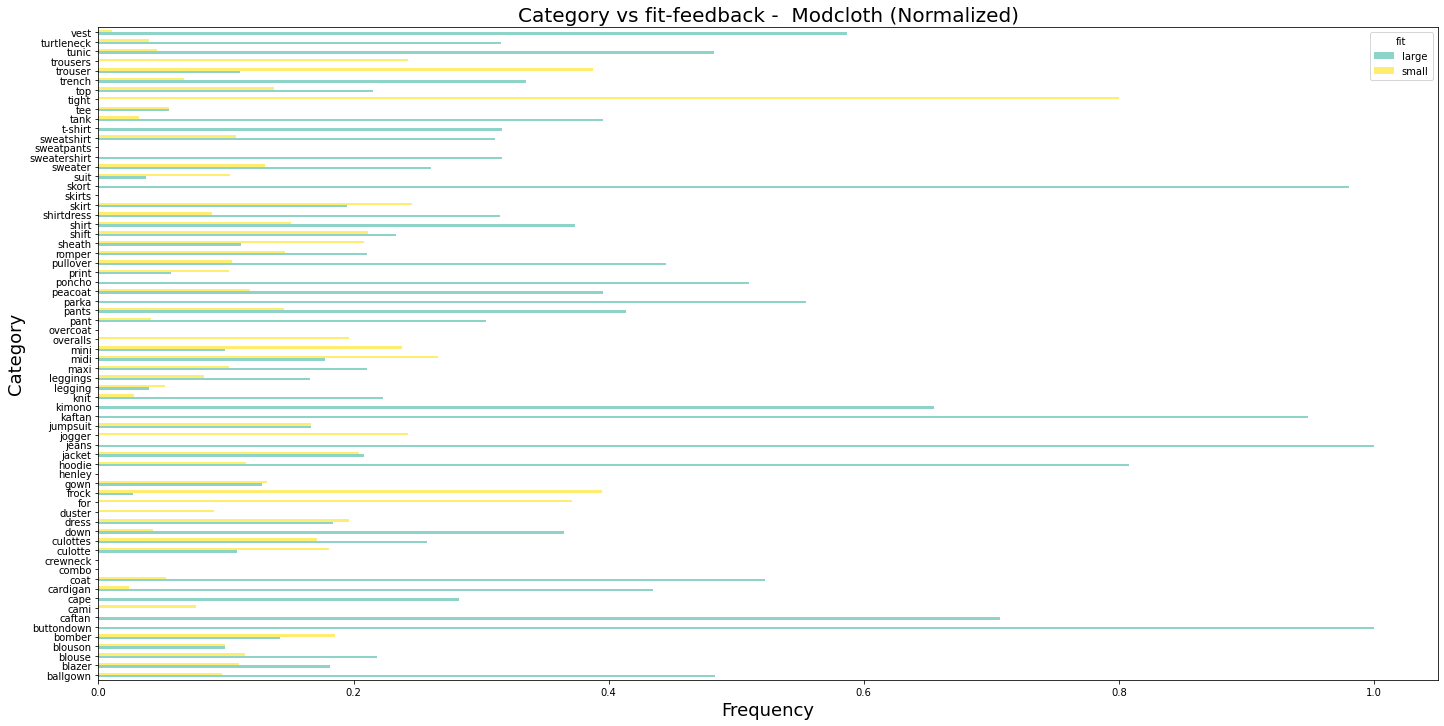

In [46]:
plot_barh(cat_fit_norm, 'fit', norm=1, cmap='Set3')

In [ ]:
cat_len = g_by_category['length'].value_counts()
cat_len = cat_len.unstack()
plot_barh(cat_len, 'length', 'Set3')

KeyError: ignored

In [49]:
import seaborn as sns

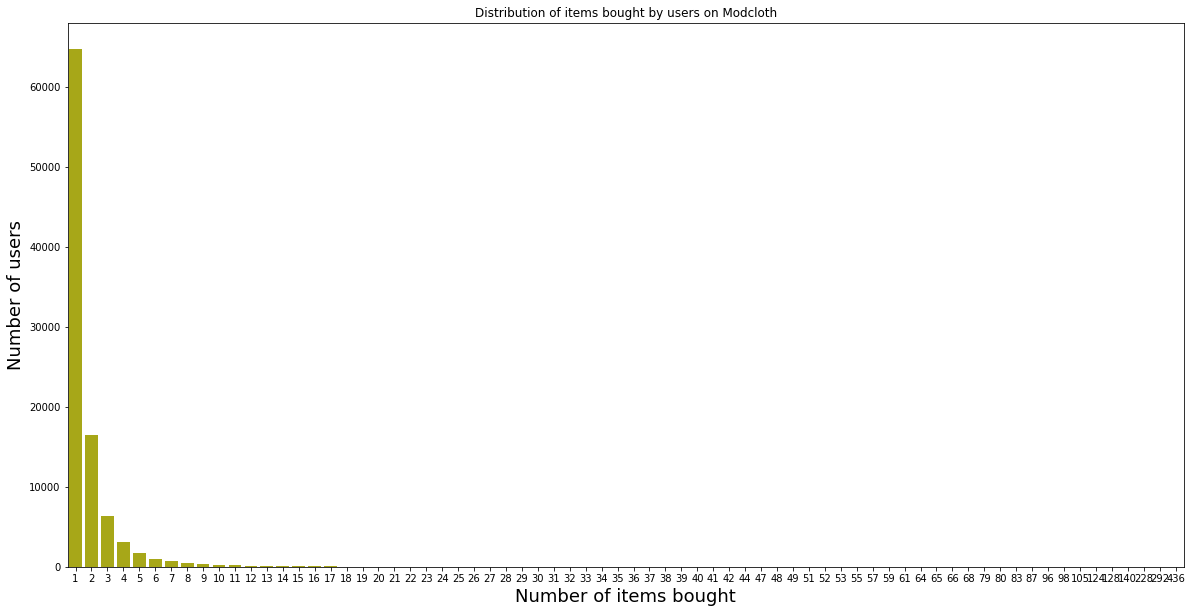

In [50]:
# Users who bought so many items
items_bought = []
total_users = []
for i in range(min(df.user_id.value_counts()), max(df.user_id.value_counts())+1):
    all_users = sum(df.user_id.value_counts() == i)
    if all_users != 0:
        total_users.append(all_users)
        items_bought.append(i)
plt.xlabel("Number of items bought", fontsize = 18)
plt.ylabel("Number of users", fontsize = 18)
plt.title("Distribution of items bought by users on Modcloth")
__ = sns.barplot(x=items_bought, y=total_users, color='y')
fig = plt.gcf()
fig.set_size_inches(20,10)

In [51]:
total_users

[64788,
 16448,
 6408,
 3060,
 1688,
 971,
 673,
 461,
 295,
 252,
 177,
 150,
 124,
 94,
 64,
 58,
 51,
 37,
 36,
 31,
 29,
 25,
 18,
 20,
 8,
 11,
 12,
 12,
 8,
 8,
 11,
 5,
 5,
 5,
 8,
 3,
 3,
 4,
 4,
 2,
 3,
 2,
 5,
 1,
 3,
 3,
 2,
 2,
 2,
 3,
 2,
 2,
 1,
 3,
 1,
 2,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1]

In [52]:
items_bought

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 44,
 47,
 48,
 49,
 51,
 52,
 53,
 55,
 57,
 59,
 61,
 64,
 65,
 66,
 68,
 79,
 80,
 83,
 87,
 96,
 98,
 105,
 124,
 128,
 140,
 228,
 292,
 436]

In [53]:
df.to_csv("/content/drive/MyDrive/git_works/renttherunway_processing.csv") #category 종류 엄청 많음..

In [54]:
df

,fit,user_id,bust_size,item_id,rating,rented_for,review_text,body_type,review_summary,category,height,size,age,review_date,weight_kg
0,fit,420272,34d,2260466,10.0,vacation,An adorable romper! Belt and zipper were a lit...,hourglass,So many compliments!,romper,152.4,14,28.0,"April 20, 2016",62.142104
1,fit,273551,34b,153475,10.0,other,I rented this dress for a photo shoot. The the...,straight & narrow,I felt so glamourous!!!,gown,152.4,12,36.0,"June 18, 2013",59.874144
3,fit,909926,34c,126335,8.0,formal affair,I rented this for my company's black tie award...,pear,Dress arrived on time and in perfect condition.,dress,152.4,8,34.0,"February 12, 2014",61.234920
4,fit,151944,34b,616682,10.0,wedding,I have always been petite in my upper body and...,athletic,Was in love with this dress !!!,gown,152.4,12,27.0,"September 26, 2016",65.770840
5,fit,734848,32b,364092,8.0,date,Didn't actually wear it. It fit perfectly. The...,athletic,Traditional with a touch a sass,dress,152.4,8,45.0,"April 30, 2016",62.595696
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192539,fit,66386,34dd,2252812,10.0,work,Fit like a glove!,hourglass,LOVE IT!!! First Item Im thinking of buying!,jumpsuit,152.4,8,42.0,"May 18, 2016",63.502880
192540,fit,118398,32c,682043,10.0,work,The pattern contrast on this dress is really s...,petite,LOVE it!,dress,152.4,4,29.0,"September 30, 2016",45.359200
192541,fit,47002,36a,683251,6.0,everyday,"Like the other DVF wraps, the fit on this is f...",straight & narrow,"Loud patterning, flattering fit",dress,152.4,8,31.0,"March 4, 2016",61.234920
192542,fit,961120,36c,126335,10.0,wedding,This dress was PERFECTION. it looked incredib...,pear,loved this dress it was comfortable and photog...,dress,152.4,16,31.0,"November 25, 2015",74.842680
